# Análise ENEM 2019







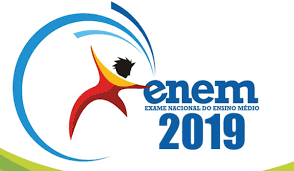

O Exame Nacional do Ensino Médio (Enem) avalia o desempenho escolar ao final da educação básica. Realizado anualmente pelo Inep, desde 1998, o Enem colabora para o acesso à educação superior – por meio do Sisu, do Prouni e de convênios com instituições portuguesas – e a programas de financiamento e apoio estudantil, caso do Fies. Os resultados também permitem o desenvolvimento de estudos e indicadores educacionais. Qualquer pessoa pode fazer o Enem, entretanto, participantes “treineiros” podem usar o resultado somente para autoavaliação de conhecimentos. (Fonte: Inep)

O Exame consiste em 4 provas distintas, a saber: 

 
*   Linguagens e Códigos, que consiste em língua portuguesa e uma estrangeira de escolha do aluno.
*   Matemática e suas tecnologias
*   Ciências Humanas, que consiste em história, geografia, sociologia e filosofia.
*   Ciências da Natureza, que consiste em química, física e biologia
*   E uma prova de redação.

Ao todo, são 180 questões divididas em 4 blocos (LC, CN, CH, MT) com 45 questões cada bloco.



---


Devido ao dataset da população que realizou o Enem 2019 total ser enorme, iremos estudar uma amostra aleatória que contém pouco mais que 127.000 dados. Essa amostra foi disponibilizada pela Alura e iremos utilizá-la para realizar nossas análises.

Nesse projeto, iremos realizar inferências, testar hipóteses. Iremos ver se a renda de um participante influência em sua nota, se a localidade onde reside influência em sua nota. Iremos analisar os dados de treineiros. Iremos estimar e analisar as idades dos participantes e ficaremos supresos ao perceber que há muita gente acima dos 18 anos realizando o exame!

E então, vem comigo?
Mão na massa!







# Importando blibliotecas 

Começaremos importando algumas bibliotecas que serão necessárias de início. Ao longo do projeto, caso precisemos de outras, importaremos depois. De início, vamos importar as bibliotecas abaixo:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Vamos salvar o caminho do dataset numa varíavel chamada "uri" e iremos utilizar a varíavel "dados" para carregar nosso dataset para o colab utilizando o método .read_csv() do pandas.

In [ ]:
uri = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

In [ ]:
dados = pd.read_csv(uri) 

Vamos ler as 5 primeiras linhas do dataset e após isso verificar as suas dimensões:

In [ ]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
dados.shape

(127380, 136)

Nossa amostra possui 127380 linhas e 136 colunas. Utilizamos o atributo .shape para visualizar a dimensão do dataframe. 
Como o dataset possui muitas colunas, o pandas omite a maioria. Sendo assim, como iremos trabalhar bastante com as notas dos alunos, iremos criar uma varíavel chamada "provas" e iremos passar uma lista com o título das 5 provas.
(Olhando no dicionário do Inep sabemos qual o nome das colunas que correspondem às provas)

Poderíamos utilizar o atributo .columns também.

In [ ]:
provas = ['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']

Assim, ao passar essa lista como se fosse uma única coluna dentro do dataframe recebemos de retorno as notas das 5 provas.

In [ ]:
dados[provas]

,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO
0,488.6,432.4,435.6,512.3,420.0
1,375.3,NaN,NaN,409.3,400.0
2,441.0,427.2,423.2,499.1,560.0
3,551.5,499.9,426.2,578.1,500.0
4,511.2,424.5,516.5,571.3,780.0
...,...,...,...,...,...
127375,525.7,539.7,502.4,559.6,740.0
127376,450.3,418.2,449.1,380.9,520.0
127377,497.9,NaN,NaN,516.0,440.0
127378,517.3,455.7,564.7,416.2,620.0


Vamos agora apagar as linhas que possuem NaN, que são os valores missing, faltantes. Umanota faltante não significa um zero, propriamente, mas sim que o aprticipante faltou àquela prova. Tendo em visto que o exame acontece em 2 finais de de semana, isso é fácil de acontecer.
Passamos o comando abaixo, com o axis = 0 indicando que queremos excluir as linhas apenas


In [ ]:
notas_limpas = dados[provas].dropna(axis=0)

In [ ]:
notas_limpas.shape

(92539, 5)

Ual! Verificando o shape dos dados "limpos" verificamos que agora é de 92.539 linhas. Tínhamos antes 127.380. Quantos faltantes! 
Mas será que realmente essas pessoas faltaram ao exame, ou tiraram zero em alguma prova?

Vamos conferir?

Tomemos como exemplo a nota de matemática. Vamos filtrar apenas os participantes que tiraram zero em matemática:

In [ ]:
notas_zero_matemática = notas_limpas['NU_NOTA_MT'] == 0
notas_limpas[notas_zero_matemática]

,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO
4923,418.5,0.0,373.4,0.0,320.0
6437,398.7,0.0,0.0,347.7,380.0
7076,419.5,0.0,0.0,315.9,0.0
8693,0.0,0.0,0.0,0.0,0.0
12954,395.9,0.0,473.5,0.0,460.0
28030,441.4,0.0,407.9,470.0,360.0
28755,556.8,0.0,0.0,606.9,660.0
34210,583.9,0.0,0.0,639.9,820.0
41918,528.4,0.0,0.0,474.4,560.0
44669,510.0,0.0,426.7,393.3,0.0


Pronto! Constatamos que não apagamos quem tirou zero. Apagamos realmente quem faltou ao exame.



Será que existe alguém que tenha tirado zero em todas as provas?
Vamos checar isso?

In [ ]:
notas_zero_matemática = notas_limpas['NU_NOTA_MT'] == 0
notas_zero_portugues = notas_limpas['NU_NOTA_LC'] == 0
notas_zero_CN = notas_limpas['NU_NOTA_CN'] == 0
notas_zero_CH = notas_limpas['NU_NOTA_CH'] == 0
notas_zero_redacao = notas_limpas['NU_NOTA_REDACAO'] == 0

notas_limpas[notas_zero_matemática & notas_zero_portugues & notas_zero_CN & notas_zero_CH & notas_zero_redacao]

,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO
8693,0.0,0.0,0.0,0.0,0.0
101269,0.0,0.0,0.0,0.0,0.0


Nossa amostra possui 2 pessoas que zeraram em todas as provas.

Do contrário, será que alguém conseguiu tirar a nota máxima na prova de redação?
A prova de redação vale 1000.
Vamos extrair as 4 maiores notas de redação da nossa amostra:


In [ ]:
notas_limpas.nlargest(4, 'NU_NOTA_REDACAO')

,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO
22973,616.7,793.1,623.6,665.7,1000.0
61045,617.4,733.5,660.3,667.9,1000.0
1544,567.7,504.2,611.6,683.6,980.0
1617,580.1,664.9,536.5,589.4,980.0


Wooow! Duas pessoas tiraram a nota máxima na prova de redação, exatamente 1000! Outras duas pessoas tiraram 980.0, uma excelente nota também.
O tema da redação do Enem 2019 foi: "Democratização do acesso ao cinema no Brasil.

Vamos agora analisar a distribuição das notas de todas as provas:

In [ ]:
notas_matematica = notas_limpas['NU_NOTA_MT']
notas_portugues = notas_limpas['NU_NOTA_LC']
notas_CN = notas_limpas['NU_NOTA_CN']
notas_CH = notas_limpas['NU_NOTA_CH']
notas_redacao = notas_limpas['NU_NOTA_REDACAO']

Text(0.5, 1.0, 'Notas - Redação')

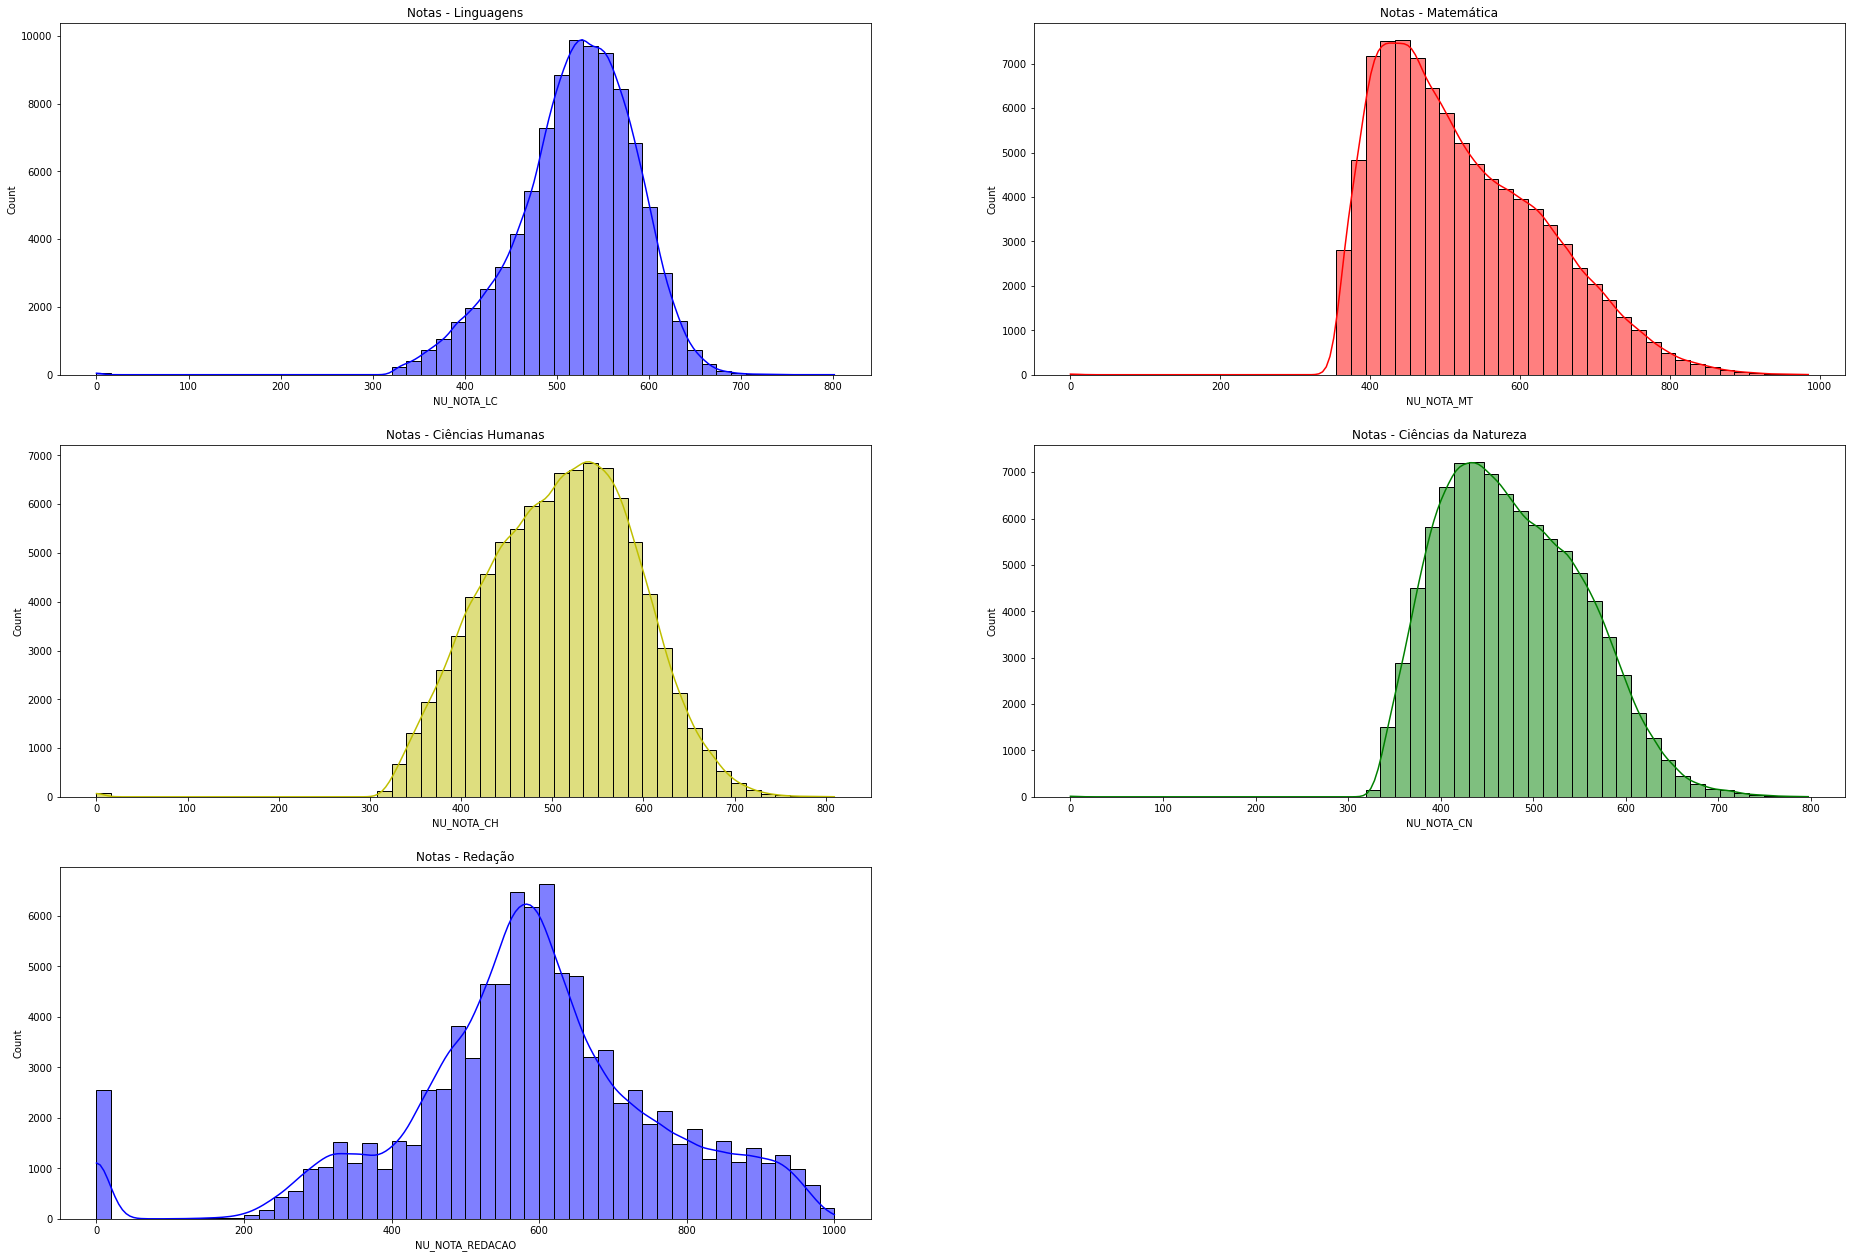

In [ ]:
fig = plt.figure(figsize=(32,22))
fig.add_subplot(3,2,1)
sns.histplot(notas_portugues, bins=50, kde=True, color = 'b')
plt.title('Notas - Linguagens')

fig.add_subplot(3,2,2)
sns.histplot(notas_matematica, bins=50, kde=True, color = 'r')
plt.title('Notas - Matemática')


fig.add_subplot(3,2,3)
sns.histplot(notas_CH, bins=50, kde=True, color = 'y')
plt.title('Notas - Ciências Humanas')

fig.add_subplot(3,2,4)
sns.histplot(notas_CN, bins=50, kde=True, color = 'g')
plt.title('Notas - Ciências da Natureza')

fig.add_subplot(3,2,5)
sns.histplot(notas_redacao, bins=50, kde=True, color = 'b')
plt.title('Notas - Redação')


Enquanto as outras demais notas aparentam ser levamente assimétricas, a distribuição das notas da redação parece ser simpetrica. Vemos que há um número considerável de notas zero, porém a maioria das notas manteve-se em torno de 600.
Vamos plotar um qqplot para verificar se a distribuição das notas de redação tende à normalidade ou não:


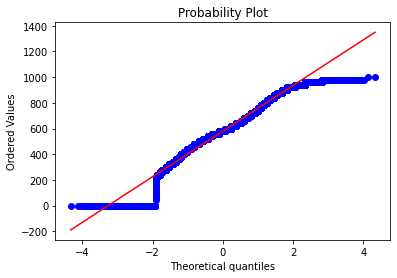

In [ ]:
from scipy import stats

fig, ax = plt.subplots()
stats.probplot(notas_redacao, plot=ax)
plt.show()

Podemos ver que há uma grande disperção nas extremidades da reta de ajuste, principlamente devido à grande quantidade de notas zero. Isso indica que os dados da nota de redação não estão normalmente distribuidos.

Para provar isso de forma melhor, não apenas por meio de uma análise gráfica, vamos, realizar um teste de hipótese de normalidade.

Nesse teste, temos a seguinte hipótese nula:

### H0 : Os dados estão normalmente distribuídos

Utizando um alfa de 0,05, vamos proceder o teste:

In [ ]:
stats.normaltest(notas_redacao)

NormaltestResult(statistic=7965.137136851712, pvalue=0.0)



*   Temos um p-valor de 0.0, ou seja, menor que o nosso alfa(0,05). Logo, rejeitamos a hipótese nula de normalidade e aceitamos a hipótese alternativa de que os dados da nota de redação não estão normalmente distribuídos.




Vamos agora plotar um boxplot das notas para avaliarmos melhor a distribuição das mesmas.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

Text(0.5, 1.0, 'Notas - Redação')

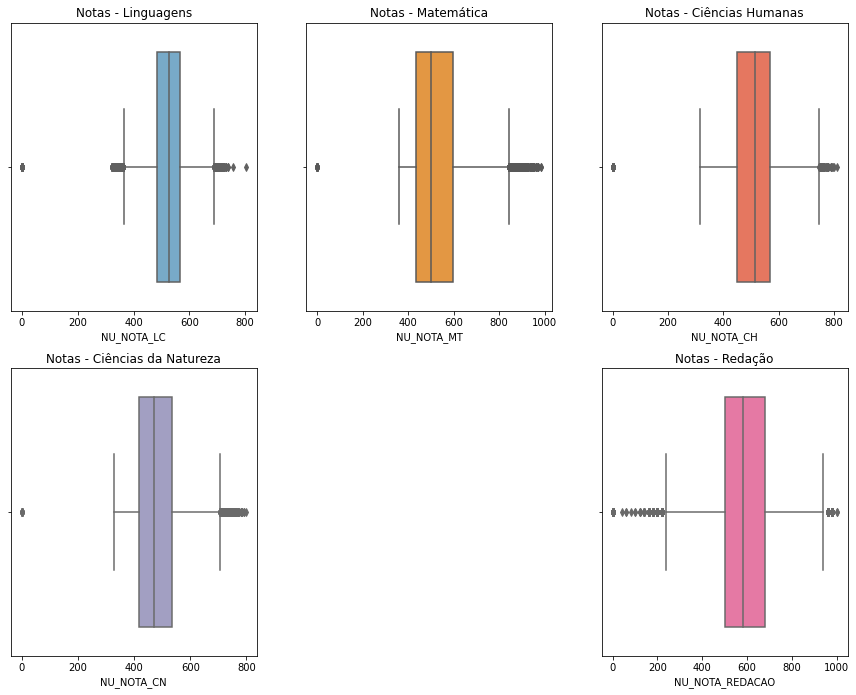

In [ ]:
fig = plt.figure(figsize=(15,18))
fig.add_subplot(3,3,1)
sns.boxplot(notas_portugues, palette='Blues')
plt.title('Notas - Linguagens')

fig.add_subplot(3,3,2)
sns.boxplot(notas_matematica, palette='YlOrBr')
plt.title('Notas - Matemática')


fig.add_subplot(3,3,3)
sns.boxplot(notas_CH, palette='Reds')
plt.title('Notas - Ciências Humanas')

fig.add_subplot(3,3,4)
sns.boxplot(notas_CN, palette='Purples')
plt.title('Notas - Ciências da Natureza')

fig.add_subplot(3,3,6)
sns.boxplot(notas_redacao, palette='RdPu')
plt.title('Notas - Redação')

Olha que legal! Vamos analisar o boxplot das notas de redação, por exemplo.
Vemos que a maioria das notas, concentram-se entre (aproximadamente) 450 a 650. E como há um número bem grande de notas abaixo de 200, estes acabam sendo os outliers da distribuição. 
Já na prova de Ciências da Natureza, ocorre o contrário. Os outliers da distribuição,ou seja, aqueles que apresentam comportamento diferente do resto da distribuição foram as pessoas que tiraram nota acima de 750. Tendo em vista que a maioria das notas concentram-se numa faixa bem abaixo, quem tirou nota mais alta é um outlier. 

Vamos checar agora a nota dos treineiros. Treineiro é aquele que está no 1 ou 2 ano do ensino médio, como o próprio nome diz, realiza o exame apenas para treinar os seus conhecimentos. 

In [ ]:
treineiros = dados.query("IN_TREINEIRO == 1")[['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']]
treineiros

,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO
0,488.6,432.4,435.6,512.3,420.0
4,511.2,424.5,516.5,571.3,780.0
12,535.8,496.7,480.3,574.7,720.0
14,438.6,450.6,352.0,422.4,400.0
16,498.9,483.8,418.1,541.1,580.0
...,...,...,...,...,...
127328,446.9,550.0,451.7,444.9,340.0
127340,583.5,615.7,578.0,585.5,720.0
127349,522.2,501.9,451.6,384.5,540.0
127350,596.6,831.8,570.5,631.1,840.0


In [ ]:
treineiros.shape

(15401, 5)

Agrupamos a nota de todas as provas, com a condição de treineiro = 1. No dicionário do Inep, treineiro = 1 é aquele que realizou a prova apenas para treinar.
E salvamos na variável "treineiros". Ao todo, 15.401 participantes se inscreveram como treineiro, como podemos ver no gráfico abaixo.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Candidatos Treineiros')

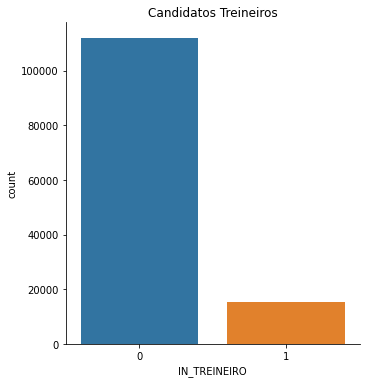

In [ ]:
sns.catplot('IN_TREINEIRO',kind = 'count', data=dados)
plt.title('Candidatos Treineiros')

Só por curiosidade, vamos ver o sexo majoritário entre treineiros. Assim como na distribuição de não treineiros, também.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Candidatos Treineiros por sexo')

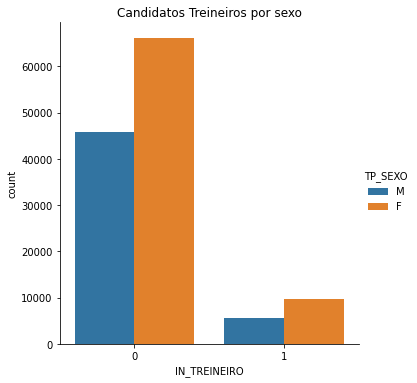

In [ ]:
sns.catplot('IN_TREINEIRO',kind = 'count', hue='TP_SEXO', data=dados)
plt.title('Candidatos Treineiros por sexo')

E o sexo feminino domina mais uma vez! hahaha
Há mais mulheres no grupo de treineiros assim como no grupo de não treineiros. Podemos saber o numero exato. Vamos lá:



In [ ]:
mulheres = dados['TP_SEXO'] == 'F'

dados[mulheres].shape

(75883, 136)

Temos ao todo 75.883 pessoas do sexo feminino. 



Vamos plotar um boxplot das notas dos treineiros para ver a dispersão das notas.
Tendo em vista que um treineiro não está em seu último ano de ensino médio, você acha que é possível tirar uma nota alta em alguma das provas?

Vamos ver!

In [ ]:
treineiros_mat = treineiros['NU_NOTA_MT']
treineiros_lc = treineiros['NU_NOTA_LC']
treineiros_cn = treineiros['NU_NOTA_CN']
treineiros_ch = treineiros['NU_NOTA_CH']
treineiros_redacao = treineiros['NU_NOTA_REDACAO']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

Text(0.5, 1.0, 'Notas - Redação')

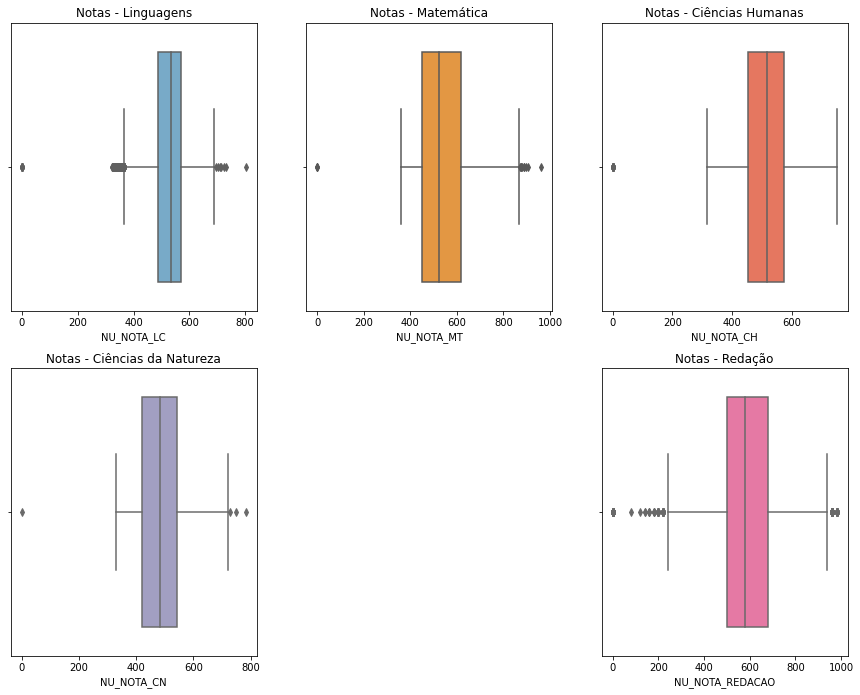

In [ ]:
fig = plt.figure(figsize=(15,18))
fig.add_subplot(3,3,1)
sns.boxplot(treineiros_lc, palette='Blues')
plt.title('Notas - Linguagens')

fig.add_subplot(3,3,2)
sns.boxplot(treineiros_mat, palette='YlOrBr')
plt.title('Notas - Matemática')


fig.add_subplot(3,3,3)
sns.boxplot(treineiros_ch, palette='Reds')
plt.title('Notas - Ciências Humanas')

fig.add_subplot(3,3,4)
sns.boxplot(treineiros_cn, palette='Purples')
plt.title('Notas - Ciências da Natureza')

fig.add_subplot(3,3,6)
sns.boxplot(treineiros_redacao, palette='RdPu')
plt.title('Notas - Redação')

Como era de esperar, uma nota muito alta seria um outlier, pois tendo em vista que um treineiro não está no seu terceiro ano, então teoricamente não estudou vários conteúdos que são requeridos pelo Enem.

Porém ainda assim, há notas bem altas no grupo de treineiros. Por exemplo, há notas acima de 900 para a redação.
Assim como há notas acima de 800 para a prova de matemática. Partindo do princípio que a nota mediana de matemática foi por volta de 500, tirar acima de 800 foi um feito e tanto!

Parabéns aos treineiros!!


Para não ficar na estipulação, vamos conferir a nota mediana de matemática?

Vamos lá:

In [ ]:
dados['NU_NOTA_MT'].median()

501.6



*   Podemos ver que a nota mediana de matemática foi de 501,6! 



Falamos bastante sobre as distribuições das notas de treineiros e oficais, vamos fazer uma análise agora com relação à idade dos participantes.
Sabemos que geralmente quem presta o Enem tem entre 17 e 18 anos, pois é a idade que a galera está terminando o ensino médio. Será isso uma verdade na prática? 

Vamos lá então:


In [ ]:
dados['NU_IDADE'].value_counts()


18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

Podemos ver que há uma galera de 17 e 18, assim como há abaixo e como há acima disso. 
Woooow.. há candidatos de 75, 73, 82 anos! Incrível. Já iremos falar disso, mas vamos ordenar nossos dados, para ver o candidato mais novo:

In [ ]:
dados['NU_IDADE'].sort_values()

95630     13
57359     13
116501    13
98197     13
115822    14
          ..
116590    75
116296    75
107247    76
84937     77
85002     82
Name: NU_IDADE, Length: 127380, dtype: int64

Olha que demais, nossa amostra possui 4 candidatos que possuem 13 anos! hahahaha
Bom, acredito que com 13 anos não se esteja no ensino médio, porém, eles entram nas estatísticas dos mais novos do Enem 2019.

Vamos ver de qual estado são esses candidatos de 13 anos:

In [ ]:
dados[dados['NU_IDADE']==13]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,1,3556701.0,Vinhedo,35.0,SP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CAEBCEBECAABCDBEEAEDDBCBACBCECAABDCACEABAEADC,BAAEC99999BCCDDEDACBAADECADBEADBADDBECADEBCBDA...,AABDCEACDDBEDABDDACBDECABACDDBAECDBECBBDEBCDA,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,200.0,200.0,200.0,160.0,920.0,E,G,C,D,3,F,A,C,C,B,A,B,B,B,A,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,1,5107602.0,Rondonópolis,51.0,MT,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,D,3,F,A,B,C,B,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,1,1600303.0,Macapá,16.0,AP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,E,D,B,4,K,B,C,D,B,A,B,B,B,B,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,1,2304400.0,Fortaleza,23.0,CE,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ADCCCCDCEAAABCEEEDAD*CCCDEBADCDBBBCBEBDBDBECC,EBBAD99999BDCBCCBCEBBCADEDDEDECDECDECECACDCECC...,ECEADDBBABCCCDBDCAAECABDCBDBCECCECABCABBBCBAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,100.0,80.0,100.0,500.0,D,F,D,B,4,D,A,E,E,C,A,B,A,B,A,B,A,A,D,A,B,C,B,C,B


Lembra que a nossa amostra possui candidatos mais velhos também?
Vamos selecionar alguns deles e saber de onde eles são:



In [ ]:
dados['NU_IDADE'].sort_values(ascending=False)

85002     82
84937     77
107247    76
116296    75
116590    75
          ..
115822    14
98197     13
116501    13
57359     13
95630     13
Name: NU_IDADE, Length: 127380, dtype: int64



*   Vamos pegar dois candidatos de nossa distribuição, um com 77 e o outro com 82 anos:





In [ ]:
dados.loc[[84937,85002]]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
84937,190004393539,2019,3303302,Niterói,33,RJ,77,F,0,1,1,3169208.0,Tombos,31.0,MG,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,C,F,2,L,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,C,B,C,B
85002,190004396266,2019,3303302,Niterói,33,RJ,82,F,4,1,1,3303302.0,Niterói,33.0,RJ,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,B,E,C,2,P,B,C,D,A,A,B,B,B,A,B,A,A,D,B,B,D,B,C,B


In [ ]:
dados[provas].loc[[84937, 85002]]

,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO
84937,NaN,NaN,NaN,NaN,NaN
85002,NaN,NaN,NaN,NaN,NaN


Ambos são de Niteroi! RJ. Porém apenas se inscreveram no exame. Infelizmente, são candidatos faltosos, como podemos ver acima, não realizaram nenhuma das provas.



Para finalizar nosso estudo, vamos analisar se o fato de um candidato não possuir compitador em casa, influencia em sua nota. 
Bom, sabemos que possuir um computador conectado à internet é bem importante nos dias atuais. No mundo globalizado que vivemos, possuir internet abre caminhos de conhecimento para nós. 

Mas será que não possuir um computador em casa influencia na nota?

Vamos ver!

O dicionário diz que o código 'Q024' refere-se à possuir computador em casa e o 'Q025' refere-se a possuir internet em casa.
'A' refere-se a não. E 'B' a sim.

Vamos filtrar algumas informações:


In [ ]:
sem_pc = dados['Q024'] == 'A'
dados[sem_pc].shape

(58724, 136)

In [ ]:
sem_internet = dados['Q025'] == 'A'
dados[sem_internet].shape

(28587, 136)

Infelizmente, temos 58.724 candidatos que não possuem computador em casa e 28.857 candidatos que não possuem internet em casa

Vamos analisar quais são os estados que possuem mais candidatos sem computador em casa:

In [ ]:
sem_computador = dados.query("Q024 == 'A'")['SG_UF_RESIDENCIA']

In [ ]:
sem_computador.value_counts()

SP    6135
BA    5573
PA    4944
MG    4702
CE    4674
MA    3898
PE    3782
RJ    2985
PB    2005
PI    1926
GO    1860
AM    1827
RS    1707
PR    1619
RN    1500
AL    1351
SE    1096
ES     975
MT     950
DF     789
RO     732
SC     728
AP     717
MS     706
TO     686
AC     664
RR     193
Name: SG_UF_RESIDENCIA, dtype: int64

Baseado nessa amostra, o estado que mais possui candidatos que não possuem computador em casa é o estado de SP, seguido pela Bahia.

Vamos ver agora a distribuição das notas com relação a não ter computador.

In [ ]:
sem_computador_notas = dados.query("Q024 == 'A'")[['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']]

In [ ]:
sem_computador_notas.head(4)

,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO
1,375.3,NaN,NaN,409.3,400.0
2,441.0,427.2,423.2,499.1,560.0
3,551.5,499.9,426.2,578.1,500.0
4,511.2,424.5,516.5,571.3,780.0


In [ ]:
lc_sem_computador = sem_computador_notas['NU_NOTA_LC']
mt_sem_computador = sem_computador_notas['NU_NOTA_MT']
cn_sem_computador = sem_computador_notas['NU_NOTA_CN']
ch_sem_computador = sem_computador_notas['NU_NOTA_CH']
redacao_sem_computador = sem_computador_notas['NU_NOTA_REDACAO']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

Text(0.5, 1.0, 'Notas - Redação')

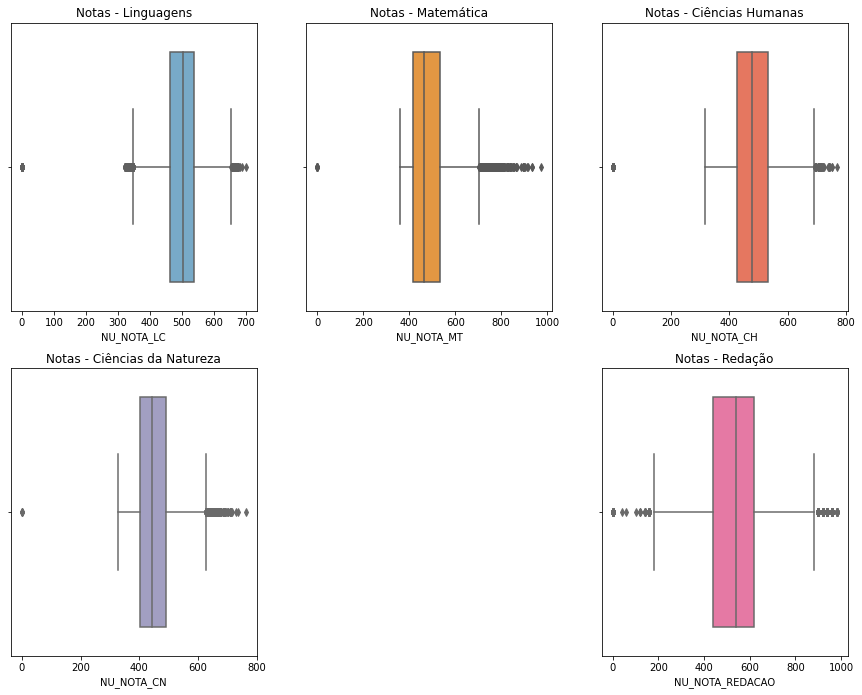

In [ ]:
fig = plt.figure(figsize=(15,18))
fig.add_subplot(3,3,1)
sns.boxplot(lc_sem_computador, palette='Blues')
plt.title('Notas - Linguagens')

fig.add_subplot(3,3,2)
sns.boxplot(mt_sem_computador, palette='YlOrBr')
plt.title('Notas - Matemática')


fig.add_subplot(3,3,3)
sns.boxplot(ch_sem_computador, palette='Reds')
plt.title('Notas - Ciências Humanas')

fig.add_subplot(3,3,4)
sns.boxplot(cn_sem_computador, palette='Purples')
plt.title('Notas - Ciências da Natureza')

fig.add_subplot(3,3,6)
sns.boxplot(redacao_sem_computador, palette='RdPu')
plt.title('Notas - Redação')

De modo geral, podemos ver que a distribuição das notas é em torno de 400 a 600. Inclusive, há muitas notas altas também. 
O fato de não possuir computador em casa é uma difculdade ao aprendizado, porém podemos ver que alguns candidatos superaram essa barreira e ainda assim tiraram notas altas em determinadas provas!
Parabéns a esses candidatos por superarem as dificuldades e serem exemplos!!

Observando o boxplot da nota de Redacao, vemos algumas notas entre 800 e 1000. Será que a pessoa que tirou 1000 na Redação não possui computador em casa?

Vamos refinar a nossa busca para cadidatos que tiraram entre 950 - 1000 na redação e que NÃO possuem computador em casa

Vamos checar? Vem comigo!



In [ ]:
notas_redacao_altas = dados['NU_NOTA_REDACAO'].between(950, 1000)

no_pc = dados['Q024'] == 'A'
dados_redacao_sem_pc = dados[notas_redacao_altas & no_pc]

dados_redacao_sem_pc.shape

(114, 137)

E olha que massa o resultado da nossa busca: 144 pessoas que não possuem computador em casa, tiraram na nota de redação, entre 950 e 1000 pontos. Incrivel, não?

Para finalizar o nosso projeto de análise do Enem, vamos ver a correlação entre as notas, ou seja, o quanto uma nota está "ligada" a outra. Como por exemplo, será que eum tirou uma nota boa na redaçãom também tira em portugês? Ou quem tira nota boa em matemática, também tira em ciências da natureza? 

Vamos analisar isso agora, e para isso, iremos plotar um mapa de caor que indicará para a gente, quais campos posseum forte correlação!

Bora ver!

Text(0.5, 1.0, 'Correlação entre as provas')

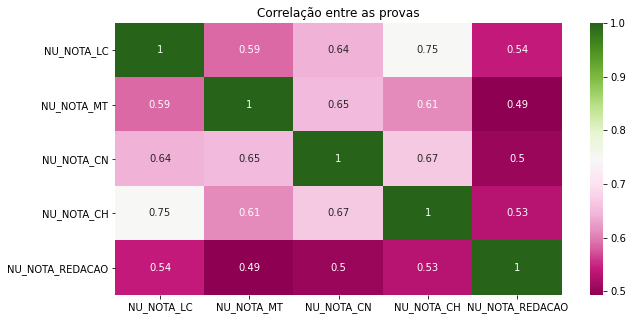

In [ ]:
figura = plt.figure(figsize=(10,5))
sns.heatmap(notas_limpas.corr(), annot=True, cmap='PiYG')
plt.title('Correlação entre as provas')

Olha que bacana, conseguimos ver uma correlação media entre a prova de LC e CH. O que isso significa? 
Que no geral, a tendência é que à medida que as notas de LC sobem, as de CH também sobem.

Vamos ver isso graficamente:



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Notas LC x Notas CH')

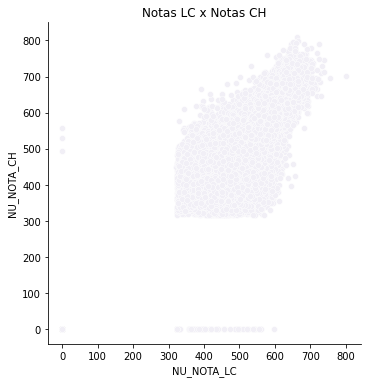

In [ ]:
sns.relplot("NU_NOTA_LC", "NU_NOTA_CH", data = notas_limpas, palette='Purples')
plt.title('Notas LC x Notas CH')

Como podemos ver, há uma tendência entre os dados. Com um coeficiente angular positivo, à medida que uma nota aumenta, a outra aumenta também. Não possuímos uma linha reta, pois é claro, não possuímos uma correlação de 1. Porém, olhando para o gráfico, conseguimos ver essa têndencia de aumento e a relação entre as duas notas. 


---



Finalizando esse projeto, vimos diversas caracteríssticas com relação às notas e outros fatores envolvendo os candidatos. Vimos a correlação das notas das provas, vimos a quantidade de faltantes, conseguimos entender a distribuição das notas e vimos que em determinadas disciplinas, um outlier é aquele quem tirou uma nota mais alta! Vimos as notas dos candidatos chamados treineiros. Analisamos o sexo majoritário dos candidatos inscritos, treineiros ou não. Também vimos a relação da nota com o uso de um computador em casa. Conseguimos analisar a idade dos estudantes e vimos que nessa edição, um candidato de 82 anos se inscreveu para o exame! Porém faltou e não realizou a prova. Quem sabe em 2020, ele não se increva novamente e teremos seus resultados aqui para analisar!!

Eu fico por aqui! 

Espero que esse projeto tenha sido util e as análises satisfatórias. 

Leonardo Guimarães.
